In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import colors

In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb

(1080, 1920, 3)


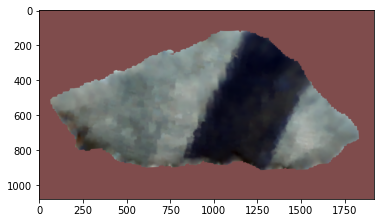

In [2]:
img_name = "RPf_00102.png"
img = cv2.imread(img_name)

print(img.shape)
plt.imshow(img)

In [3]:
img.dtype

dtype('uint8')

In [5]:
def plotRGB(pic):
    r, g, b = cv2.split(pic)

    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    pixel_colors = pic.reshape((np.shape(pic)[0] * np.shape(pic)[1], 3))
    norm = colors.Normalize(vmin=-1.0, vmax=1.0)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    axis.scatter(
        r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
    )
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()
    return pixel_colors


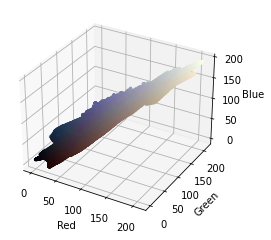

In [6]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pixel_colors = plotRGB(img_rgb)

In [11]:
img_normalized = img/255
img_n = img_normalized.reshape(img_normalized.shape[0]*img_normalized.shape[1], img_normalized.shape[2]) # transform to 2d array
img_n.shape

(2073600, 3)

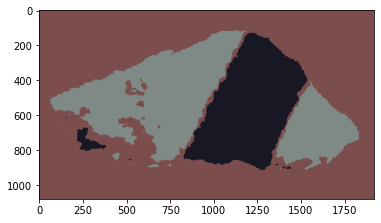

In [12]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(img_n)
img_to_show = kmeans.cluster_centers_[kmeans.labels_]
cluster_img = img_to_show.reshape(img.shape[0],img.shape[1],img.shape[2])
plt.imshow((cluster_img * 255).astype(np.uint8))

In [13]:
# Todo : Try the Hue base color. 
# Todo: Try the region growing
#https://realpython.com/python-opencv-color-spaces/

# The most relevant experiment is here

In [4]:
r,g,b = cv2.split(img)

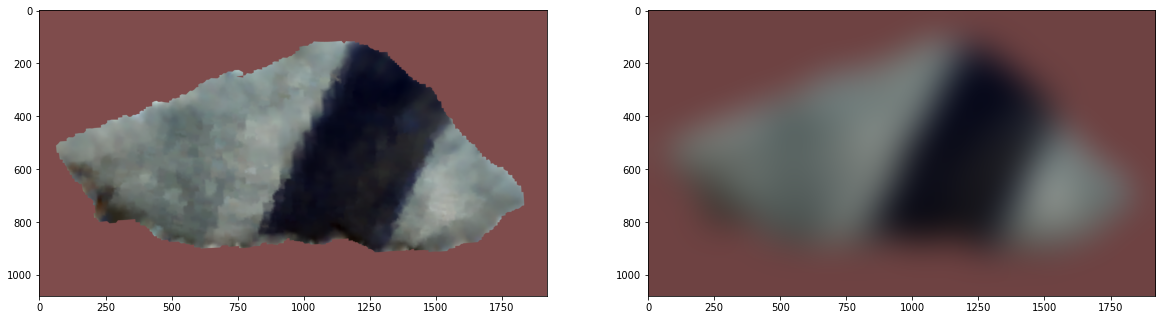

In [5]:
def mean_smooth_channel(channel,kernel_size):
    mean_kernel = np.ones(kernel_size,np.float32)/(kernel_size[0]*kernel_size[1])
    return cv2.filter2D(channel,-1,mean_kernel)

kernel_size = (150,150) #(130,130)
_, axes = plt.subplots(1,2,figsize=(20,20))


r = mean_smooth_channel(r,kernel_size)
g = mean_smooth_channel(g,kernel_size)
b = mean_smooth_channel(b,kernel_size)

gaus_kernel_size = (301,301)
r = cv2.GaussianBlur(r,gaus_kernel_size,0)
g = cv2.GaussianBlur(g,gaus_kernel_size,0)
b = cv2.GaussianBlur(b,gaus_kernel_size,0)


                    
smoothed_img = cv2.merge((r,
                      g,
                      b))





axes[0].imshow(img)
axes[1].imshow(smoothed_img)

In [9]:
(smoothed_img).astype(np.float32).dtype

dtype('float32')

In [10]:
cv2.imwrite("smoothed_RPf_00102.png",smoothed_img.astype(np.float32))

True

In [12]:
img_normalized = smoothed_img/255.0
img_n = img_normalized.reshape(img_normalized.shape[0]*img_normalized.shape[1], img_normalized.shape[2]) # transform to 2d array
img_n.shape
kmeans = KMeans(n_clusters=3,random_state=0).fit(img_n)

In [13]:
 kmeans.cluster_centers_

array([[0.40839423, 0.26745262, 0.26766465],
       [0.11783745, 0.1108065 , 0.14803614],
       [0.41162016, 0.42253341, 0.41527786]])

In [14]:
kmeans.labels_.shape

(2073600,)

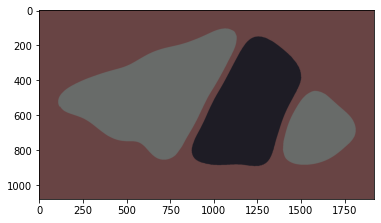

In [15]:
img_to_show = kmeans.cluster_centers_[kmeans.labels_]
cluster_img = img_to_show.reshape(smoothed_img.shape[0],
                                  smoothed_img.shape[1],
                                  smoothed_img.shape[2])
plt.imshow((cluster_img * 255).astype(np.uint8))

In [16]:
cluster_img.dtype

dtype('float64')

In [17]:
cv2.imwrite("RPf_00102_segmented.png",(cluster_img * 255),)

True

In [7]:
import random

In [8]:
segments_colors = np.array([255 * np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)]) for _ in kmeans.cluster_centers_])
segments_colors

array([[181.55221948, 129.80454956,  18.9081313 ],
       [ 69.32067801,  76.5457071 , 117.42987774],
       [185.06130751, 243.86863321, 102.13510115]])

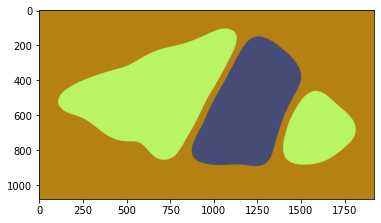

In [9]:
img_to_show_ = segments_colors[kmeans.labels_]
cluster_img_ = img_to_show_.reshape(smoothed_img.shape[0],
                                  smoothed_img.shape[1],
                                  smoothed_img.shape[2])
plt.imshow((cluster_img_).astype(np.uint8))

In [13]:
img_ = cv2.cvtColor(cluster_img_,cv2.COLOR_BGR2GRAY)

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [11]:
edge_map = cv2.Canny(cluster_img_,threshold1=3,threshold2=3*3) 

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


In [12]:
plt.imshow(edge_map,cmap='gray')

NameError: name 'edge_map' is not defined

In [7]:
hsv_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

In [8]:
def plotHSV(pic,pixel_colors):
    h, s, v = cv2.split(pic)

    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    #pixel_colors = pic.reshape((np.shape(pic)[0] * np.shape(pic)[1], 3))
    axis.scatter(
        h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
    )
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()

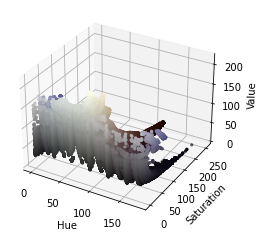

In [9]:
plotHSV(hsv_img,pixel_colors)

# New Experiment

(1080, 1920, 3)


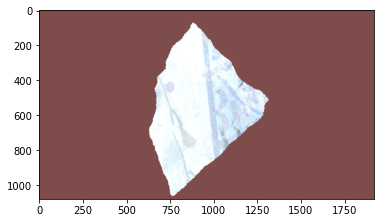

In [3]:
img_name = "RPf_00152_obj.png"
img = cv2.imread(img_name)

print(img.shape)
plt.imshow(img)